# Importing Toolkits

In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Importing libraries for classification task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load dataset

df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# drop id column
df.drop('Id', axis=1,inplace= True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Check Correlation

In [ ]:
#Select only  numerical columns
numerical_columns = df.select_dtypes(include=['number'])


#compute correlation matrix
correlation_matrix = numerical_columns.corr()

In [ ]:
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


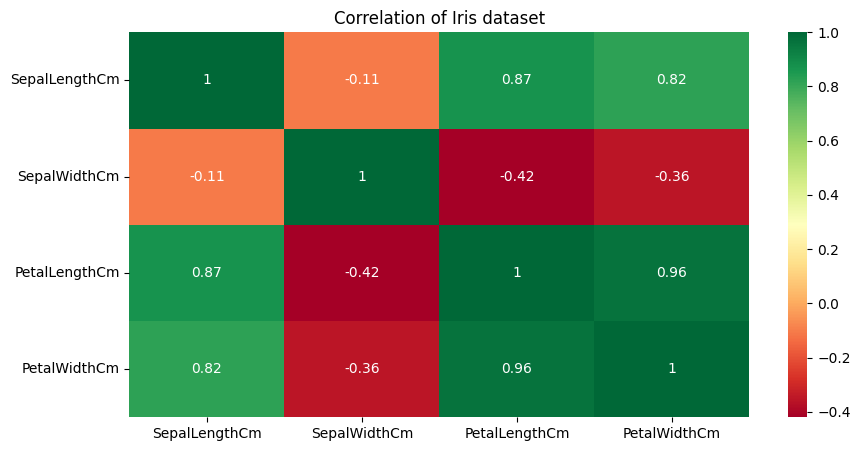

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True , cmap='RdYlGn')
plt.title("Correlation of Iris dataset")
plt.show()

In [ ]:
# Baic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Overview of dataset
print("Number of Rows :", df.shape[0])
print("/number of columns:" , df.shape[1])

Number of Rows : 150
/number of columns: 5


In [ ]:
#Describe the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
#Check  unique values
df.nunique()

,0
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


# check missing Values

In [ ]:
#Check Null values
missing = df.isnull().sum().sort_values(ascending = False)
missing

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
# Deal with duplicates values

df.duplicated().sum()

np.int64(3)

In [ ]:
## Drop duplicate values
df.drop_duplicates(inplace=True)

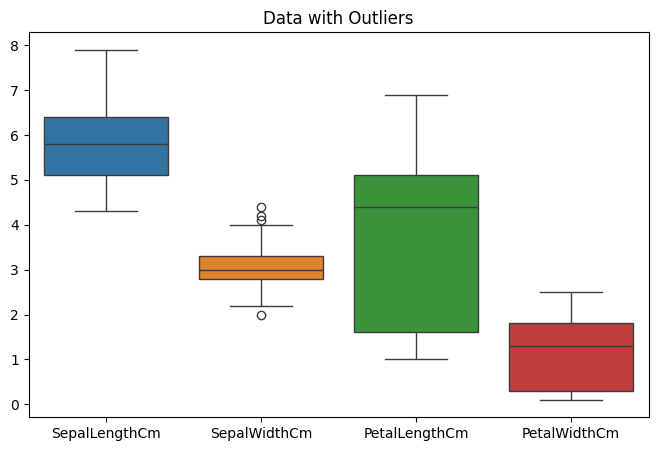

In [ ]:
#visualize the data before handling outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.title("Data with Outliers")
plt.show()

# Visualization

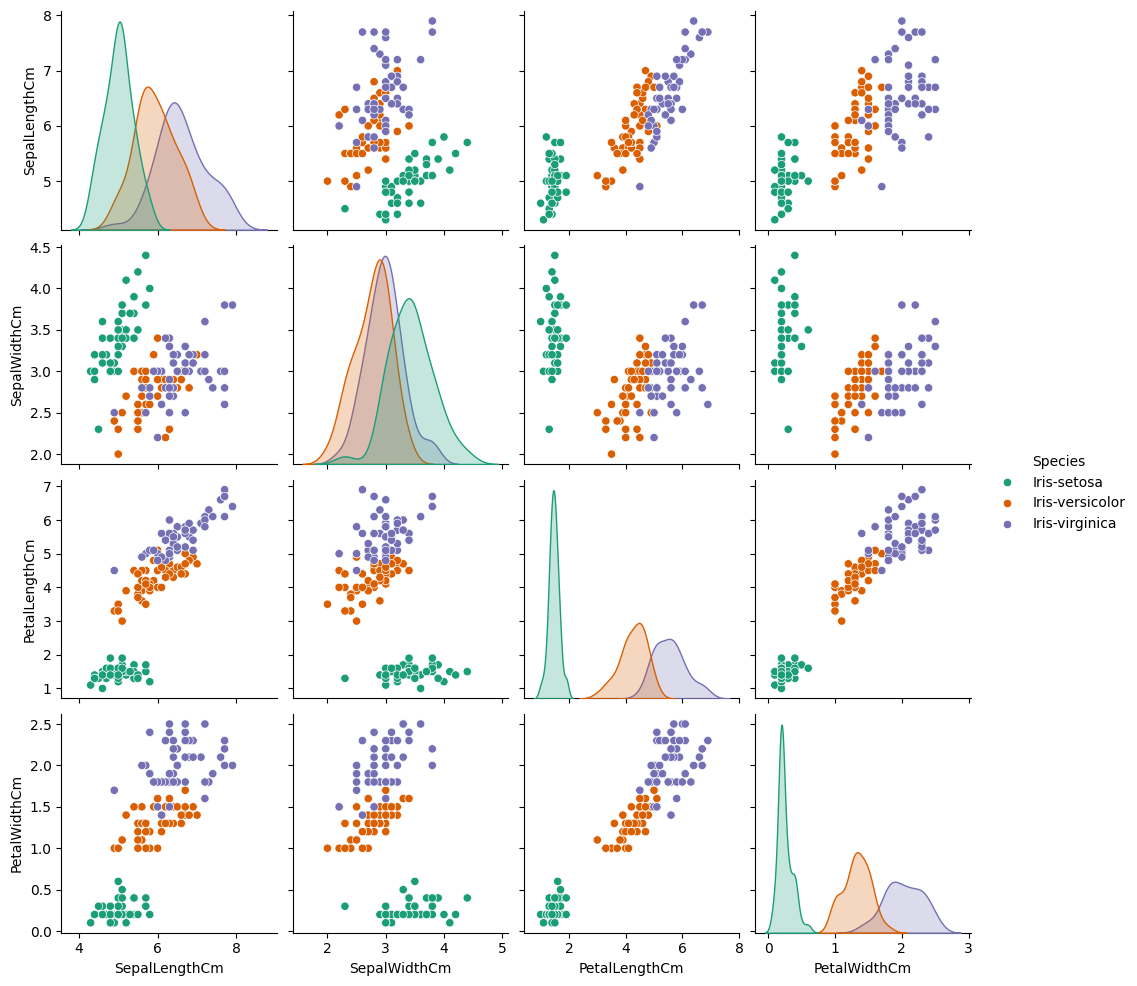

In [ ]:
# Make Pair Plot
sns.pairplot(df,hue='Species', palette = 'Dark2', diag_kind ='kde' )
plt.show()

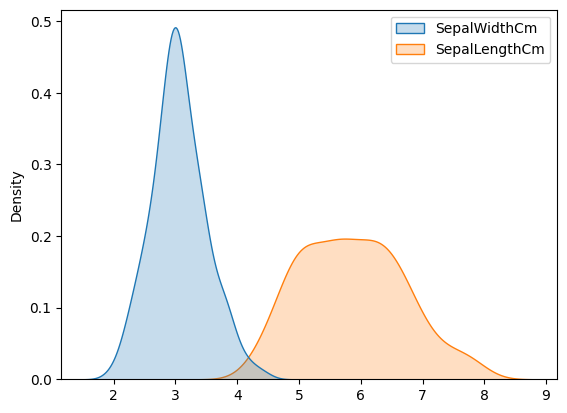

In [ ]:
sns.kdeplot(df[['SepalWidthCm', 'SepalLengthCm']], fill = True)
plt.show()

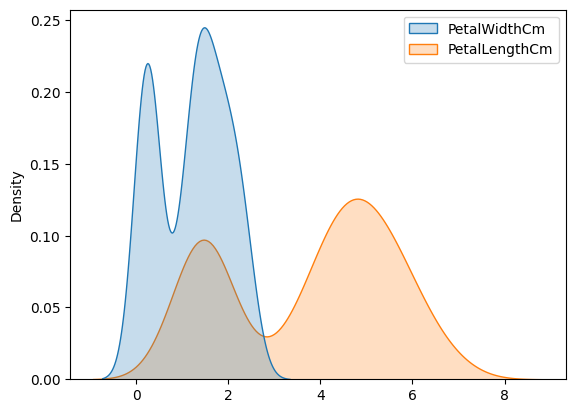

In [ ]:
sns.kdeplot(df[['PetalWidthCm', 'PetalLengthCm']], fill = True)
plt.show()

In [ ]:
x = df.drop(['Species'],axis=1)
y = df['Species']


In [ ]:
#Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

In [ ]:
#create model
lg = LogisticRegression()

In [ ]:
#Fit the model
clf = lg.fit(x_train,y_train)

In [ ]:
#Predict the model
y_pred = clf.predict(x_test)

In [ ]:
#Evaluate the model
print("accuracy score:",accuracy_score(y_test,y_pred))


accuracy score: 0.9333333333333333


In [ ]:
#Print classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

